In [1]:
import pandas as pd
import numpy as np
import sys
import sklearn
import io
import random

In [2]:
train_data = pd.read_csv('Friday-02-03-2018_TrafficForML_CICFlowMeter_s120000Training.csv')
test_data = pd.read_csv('Friday-02-03-2018_TrafficForML_CICFlowMeter_s22000Testing.csv')



In [3]:
print('Dimensions of the Training set:',train_data.shape)
print('Dimensions of the Testing set:',test_data.shape)



Dimensions of the Training set: (119721, 83)
Dimensions of the Testing set: (21940, 83)


In [4]:
train_data.head(5)

,Unnamed: 0,Dst Port,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Protocol_0,Protocol_6,Protocol_17
0,83436,3389,2/3/2018 5:04,1663241,8,7,1128,1581.0,661,0,...,0.0,0.0,0.000,0.000,0.0,0.0,0,0,1,0
1,62357,443,2/3/2018 5:12,116252603,61,109,598,129493.0,342,0,...,679582.0,32072.0,9601618.667,1418120.035,10100000.0,5099243.0,0,0,1,0
2,10901,80,2/3/2018 3:41,1002,3,4,148,243.0,148,0,...,0.0,0.0,0.000,0.000,0.0,0.0,0,0,1,0
3,30997,53,2/3/2018 9:09,1278,1,1,40,139.0,40,40,...,0.0,0.0,0.000,0.000,0.0,0.0,0,0,0,1
4,87079,52371,2/3/2018 11:59,30,2,0,0,0.0,0,0,...,0.0,0.0,0.000,0.000,0.0,0.0,0,0,1,0


In [5]:
train_data.pop("Unnamed: 0")
test_data.pop("Unnamed: 0")

0         7366
1         7827
2         1992
3        18099
4         5783
         ...  
21935    12302
21936    15012
21937    19893
21938     8769
21939    19532
Name: Unnamed: 0, Length: 21940, dtype: int64

In [6]:
train_data.pop("Timestamp")
test_data.pop("Timestamp")

0         2/3/2018 9:41
1         2/3/2018 3:30
2        2/3/2018 10:34
3         2/3/2018 1:51
4         2/3/2018 4:00
              ...      
21935    2/3/2018 11:20
21936     2/3/2018 3:31
21937     2/3/2018 1:41
21938     2/3/2018 2:26
21939     2/3/2018 3:50
Name: Timestamp, Length: 21940, dtype: object

In [7]:
train_data = train_data[np.isfinite(train_data).all(1)]
test_data = test_data[np.isfinite(test_data).all(1)]

In [8]:
print('Label distribution Training set:')
print(train_data['Label'].value_counts())
print()
print('Label distribution Test set:')
print(test_data['Label'].value_counts())

Label distribution Training set:
0    86792
1    32750
Name: Label, dtype: int64

Label distribution Test set:
0    15810
1     6096
Name: Label, dtype: int64


In [9]:
print('Dimensions of the Training set:',train_data.shape)
print('Dimensions of the Testing set:',test_data.shape)

Dimensions of the Training set: (119542, 81)
Dimensions of the Testing set: (21906, 81)


In [10]:
to_drop_Benign = [0,0]
to_drop_Anomaly = [0,1]

Benign_df=train_data[train_data['Label'].isin(to_drop_Benign)];
Anomaly_df=train_data[train_data['Label'].isin(to_drop_Anomaly)];

#test
Benign_df_test=test_data[test_data['Label'].isin(to_drop_Benign)];
Anomaly_df_test=test_data[test_data['Label'].isin(to_drop_Anomaly)];

print('Train:')
print('Dimensions of Benign:' ,Benign_df.shape)
print('Dimensions of Anomaly:' ,Anomaly_df.shape)
print()
print('Test:')
print('Dimensions of Begin:' ,Benign_df_test.shape)
print('Dimensions of Anomaly:' ,Anomaly_df_test.shape)

Train:
Dimensions of Benign: (86792, 81)
Dimensions of Anomaly: (119542, 81)

Test:
Dimensions of Begin: (15810, 81)
Dimensions of Anomaly: (21906, 81)


In [11]:
#Split dataframes into X & Y
# X Properties, Y result variables

X_Benign = Benign_df.drop('Label',1)
Y_Benign = Benign_df.Label

X_Anomaly = Anomaly_df.drop('Label',1)
Y_Anomaly = Anomaly_df.Label


#test
X_Benign_test = Benign_df_test.drop('Label',1)
Y_Benign_test = Benign_df_test.Label

X_Anomaly_test = Anomaly_df_test.drop('Label',1)
Y_Anomaly_test = Anomaly_df_test.Label


In [12]:
from sklearn import preprocessing

scaler1 = preprocessing.StandardScaler().fit(X_Anomaly)
X_Anomaly=scaler1.transform(X_Anomaly)


# test data

scaler2 = preprocessing.StandardScaler().fit(X_Anomaly_test)
X_Anomaly_test=scaler2.transform(X_Anomaly_test)

# SVM

In [13]:
import time

In [14]:
from sklearn.svm import SVC

clf_SVM_Anomaly=SVC(kernel='linear', C=1.0, random_state=0)
train0 = time.time()

clf_SVM_Anomaly.fit(X_Anomaly, Y_Anomaly.astype(int))
train1 = time.time() - train0

In [15]:
test0 = time.time()
Y_Anomaly_pred=clf_SVM_Anomaly.predict(X_Anomaly_test)
test1 = time.time() - test0

# Create confusion matrix
pd.crosstab(Y_Anomaly_test, Y_Anomaly_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])


Predicted attacks,0,1
Actual attacks,,
0,15524,286
1,1,6095


In [16]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(Y_Anomaly_test, Y_Anomaly_pred)

print('Confusion_matrix')
print(cnf_matrix)
print('....')

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP+FN+TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)

print('FP', FP)
print('FN', FN)
print('TP', TP)
print('TN', TN)
print('TPR', TPR)
print('TNR', TNR)
print('PPV', PPV)
print('FPR', FPR)
print('FNR', FNR)
print('FDR', FDR)
print('ACC', ACC)

Confusion_matrix
[[15524   286]
 [    1  6095]]
....
FP [  1. 286.]
FN [286.   1.]
TP [15524.  6095.]
TN [ 6095. 15524.]
TPR [0.98191018 0.99983596]
TNR [0.99983596 0.98191018]
PPV [0.99993559 0.95517944]
FPR [0.00016404 0.01808982]
FNR [0.01808982 0.00016404]
FDR [6.44122383e-05 4.48205610e-02]
ACC [0.98689857 0.98689857]


In [17]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf_SVM_Anomaly, X_Anomaly_test, Y_Anomaly_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_SVM_Anomaly, X_Anomaly_test, Y_Anomaly_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_SVM_Anomaly, X_Anomaly_test, Y_Anomaly_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_SVM_Anomaly, X_Anomaly_test, Y_Anomaly_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))
print("train_time:%.3fs\n" %train1)
print("test_time:%.3fs\n" %test1)

Accuracy: 0.98708 (+/- 0.00344)
Precision: 0.95625 (+/- 0.01198)
Recall: 0.99934 (+/- 0.00301)
F-measure: 0.97731 (+/- 0.00589)
train_time:141.066s

test_time:9.141s



In [18]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(Y_Anomaly_test, Y_Anomaly_pred)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve: %f", roc_auc)
print("Threshold: %f", thresholds)
print("FPR: %f", fpr)
print("TPR: %f", tpr)

Area under the ROC curve: %f 0.9908730707167297
Threshold: %f [2 1 0]
FPR: %f [0.         0.01808982 1.        ]
TPR: %f [0.         0.99983596 1.        ]


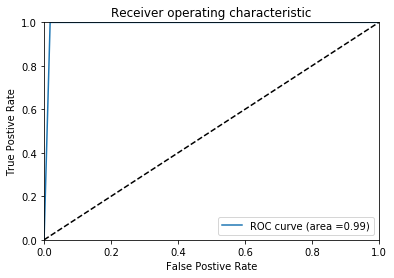

In [19]:
import pylab as pl

pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area =%0.2f)'% roc_auc)
pl.plot([0,1],[0,1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Postive Rate')
pl.ylabel('True Postive Rate')
pl.title('Receiver operating characteristic')
pl.legend(loc="lower right")
pl.savefig("ids_linear_roc")

In [20]:
from sklearn.svm import SVC

clf_SVM_Anomaly=SVC(kernel='rbf', C=1.0, random_state=0)
train0 = time.time()

clf_SVM_Anomaly.fit(X_Anomaly, Y_Anomaly.astype(int))
train1 = time.time() - train0

In [21]:
test0 = time.time()
Y_Anomaly_pred=clf_SVM_Anomaly.predict(X_Anomaly_test)
test1 = time.time() - test0

# Create confusion matrix
pd.crosstab(Y_Anomaly_test, Y_Anomaly_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,15744,66
1,1,6095


In [22]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(Y_Anomaly_test, Y_Anomaly_pred)

print('Confusion_matrix')
print(cnf_matrix)
print('....')

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP+FN+TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)

print('FP', FP)
print('FN', FN)
print('TP', TP)
print('TN', TN)
print('TPR', TPR)
print('TNR', TNR)
print('PPV', PPV)
print('FPR', FPR)
print('FNR', FNR)
print('FDR', FDR)
print('ACC', ACC)

Confusion_matrix
[[15744    66]
 [    1  6095]]
....
FP [ 1. 66.]
FN [66.  1.]
TP [15744.  6095.]
TN [ 6095. 15744.]
TPR [0.99582543 0.99983596]
TNR [0.99983596 0.99582543]
PPV [0.99993649 0.98928745]
FPR [0.00016404 0.00417457]
FNR [0.00417457 0.00016404]
FDR [6.35122261e-05 1.07125467e-02]
ACC [0.99694148 0.99694148]


In [23]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf_SVM_Anomaly, X_Anomaly_test, Y_Anomaly_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_SVM_Anomaly, X_Anomaly_test, Y_Anomaly_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_SVM_Anomaly, X_Anomaly_test, Y_Anomaly_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_SVM_Anomaly, X_Anomaly_test, Y_Anomaly_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))
print("train_time:%.3fs\n" %train1)
print("test_time:%.3fs\n" %test1)

Accuracy: 0.98795 (+/- 0.00594)
Precision: 0.96004 (+/- 0.01929)
Recall: 0.99836 (+/- 0.00388)
F-measure: 0.97880 (+/- 0.01019)
train_time:747.390s

test_time:12.460s



In [24]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(Y_Anomaly_test, Y_Anomaly_pred)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve: %f", roc_auc)
print("Threshold: %f", thresholds)
print("FPR: %f", fpr)
print("TPR: %f", tpr)

Area under the ROC curve: %f 0.9978306924751105
Threshold: %f [2 1 0]
FPR: %f [0.         0.00417457 1.        ]
TPR: %f [0.         0.99983596 1.        ]


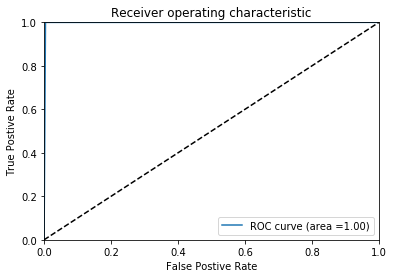

In [25]:
import pylab as pl

pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area =%0.2f)'% roc_auc)
pl.plot([0,1],[0,1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Postive Rate')
pl.ylabel('True Postive Rate')
pl.title('Receiver operating characteristic')
pl.legend(loc="lower right")
pl.savefig("ids_rbf_roc")

In [26]:
from sklearn.svm import SVC

clf_SVM_Anomaly=SVC(kernel='poly', C=1.0, random_state=0)
train0 = time.time()

clf_SVM_Anomaly.fit(X_Anomaly, Y_Anomaly.astype(int))
train1 = time.time() - train0

In [27]:
test0 = time.time()
Y_Anomaly_pred=clf_SVM_Anomaly.predict(X_Anomaly_test)
test1 = time.time() - test0

# Create confusion matrix
pd.crosstab(Y_Anomaly_test, Y_Anomaly_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,15466,344
1,1,6095


In [28]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(Y_Anomaly_test, Y_Anomaly_pred)

print('Confusion_matrix')
print(cnf_matrix)
print('....')

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP+FN+TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)

print('FP', FP)
print('FN', FN)
print('TP', TP)
print('TN', TN)
print('TPR', TPR)
print('TNR', TNR)
print('PPV', PPV)
print('FPR', FPR)
print('FNR', FNR)
print('FDR', FDR)
print('ACC', ACC)

Confusion_matrix
[[15466   344]
 [    1  6095]]
....
FP [  1. 344.]
FN [344.   1.]
TP [15466.  6095.]
TN [ 6095. 15466.]
TPR [0.97824162 0.99983596]
TNR [0.99983596 0.97824162]
PPV [0.99993535 0.94657556]
FPR [0.00016404 0.02175838]
FNR [0.02175838 0.00016404]
FDR [6.46537790e-05 5.34244448e-02]
ACC [0.98425089 0.98425089]


In [29]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf_SVM_Anomaly, X_Anomaly_test, Y_Anomaly_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_SVM_Anomaly, X_Anomaly_test, Y_Anomaly_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_SVM_Anomaly, X_Anomaly_test, Y_Anomaly_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_SVM_Anomaly, X_Anomaly_test, Y_Anomaly_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))
print("train_time:%.3fs\n" %train1)
print("test_time:%.3fs\n" %test1)

Accuracy: 0.95700 (+/- 0.00579)
Precision: 0.86675 (+/- 0.01588)
Recall: 0.99918 (+/- 0.00395)
F-measure: 0.92824 (+/- 0.00902)
train_time:536.019s

test_time:24.225s



In [30]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(Y_Anomaly_test, Y_Anomaly_pred)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve: %f", roc_auc)
print("Threshold: %f", thresholds)
print("FPR: %f", fpr)
print("TPR: %f", tpr)

Area under the ROC curve: %f 0.989038788616793
Threshold: %f [2 1 0]
FPR: %f [0.         0.02175838 1.        ]
TPR: %f [0.         0.99983596 1.        ]


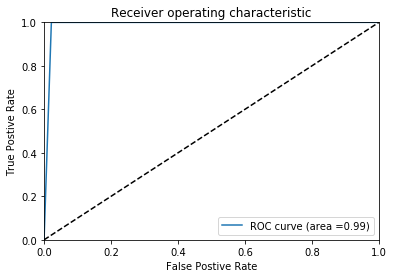

In [31]:
import pylab as pl

pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area =%0.2f)'% roc_auc)
pl.plot([0,1],[0,1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Postive Rate')
pl.ylabel('True Postive Rate')
pl.title('Receiver operating characteristic')
pl.legend(loc="lower right")
pl.savefig("ids_poly_roc")

In [32]:
from sklearn.svm import SVC

clf_SVM_Anomaly=SVC(kernel='sigmoid', C=1.0, random_state=0)
train0 = time.time()

clf_SVM_Anomaly.fit(X_Anomaly, Y_Anomaly.astype(int))
train1 = time.time() - train0

In [33]:
test0 = time.time()
Y_Anomaly_pred=clf_SVM_Anomaly.predict(X_Anomaly_test)
test1 = time.time() - test0

# Create confusion matrix
pd.crosstab(Y_Anomaly_test, Y_Anomaly_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,14795,1015
1,15,6081


In [34]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(Y_Anomaly_test, Y_Anomaly_pred)

print('Confusion_matrix')
print(cnf_matrix)
print('....')

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP+FN+TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)

print('FP', FP)
print('FN', FN)
print('TP', TP)
print('TN', TN)
print('TPR', TPR)
print('TNR', TNR)
print('PPV', PPV)
print('FPR', FPR)
print('FNR', FNR)
print('FDR', FDR)
print('ACC', ACC)

Confusion_matrix
[[14795  1015]
 [   15  6081]]
....
FP [  15. 1015.]
FN [1015.   15.]
TP [14795.  6081.]
TN [ 6081. 14795.]
TPR [0.93580013 0.99753937]
TNR [0.99753937 0.93580013]
PPV [0.99898717 0.85696167]
FPR [0.00246063 0.06419987]
FNR [0.06419987 0.00246063]
FDR [0.00101283 0.14303833]
ACC [0.95298092 0.95298092]


In [35]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf_SVM_Anomaly, X_Anomaly_test, Y_Anomaly_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_SVM_Anomaly, X_Anomaly_test, Y_Anomaly_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_SVM_Anomaly, X_Anomaly_test, Y_Anomaly_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_SVM_Anomaly, X_Anomaly_test, Y_Anomaly_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))
print("train_time:%.3fs\n" %train1)
print("test_time:%.3fs\n" %test1)

Accuracy: 0.95371 (+/- 0.00533)
Precision: 0.86770 (+/- 0.01532)
Recall: 0.98376 (+/- 0.01266)
F-measure: 0.92206 (+/- 0.00856)
train_time:2597.556s

test_time:34.389s



In [36]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(Y_Anomaly_test, Y_Anomaly_pred)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve: %f", roc_auc)
print("Threshold: %f", thresholds)
print("FPR: %f", fpr)
print("TPR: %f", tpr)

Area under the ROC curve: %f 0.966669748290477
Threshold: %f [2 1 0]
FPR: %f [0.         0.06419987 1.        ]
TPR: %f [0.         0.99753937 1.        ]


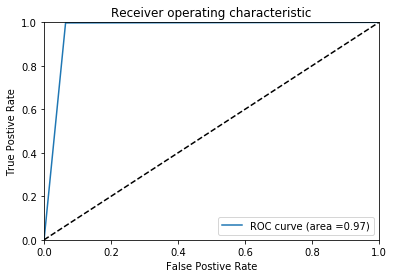

In [37]:
import pylab as pl

pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area =%0.2f)'% roc_auc)
pl.plot([0,1],[0,1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Postive Rate')
pl.ylabel('True Postive Rate')
pl.title('Receiver operating characteristic')
pl.legend(loc="lower right")
pl.savefig("ids_sigmoid_roc")